# REST API data read from openweathermap server

#### Weather forecast for NSW cities

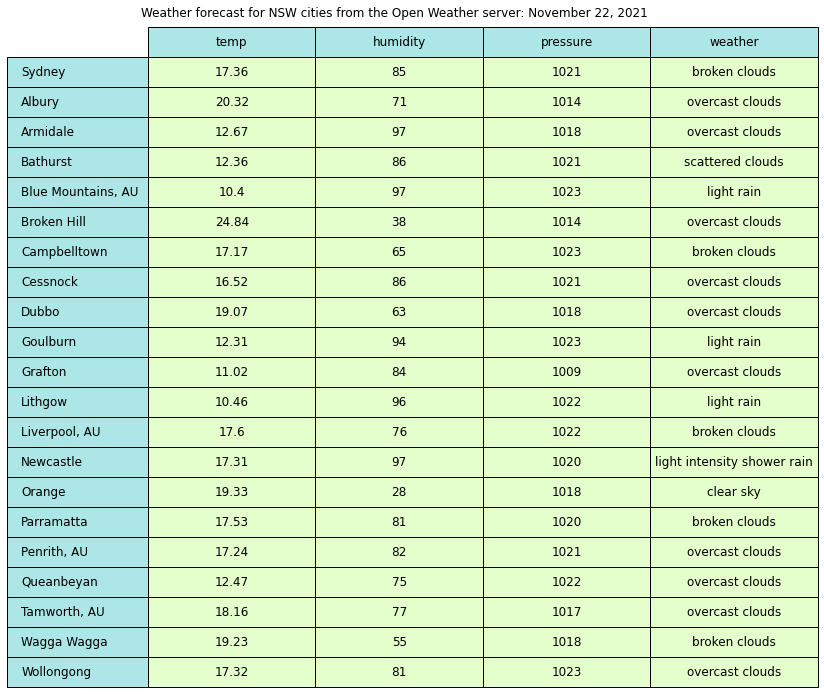

In [3]:
# importing modules
import  requests, json
import  yaml
import  numpy as np
from    datetime   import date
from    matplotlib import pyplot as plt


# Get the API key
with open("config.yml", 'r') as ymlfile:
    cfg = yaml.safe_load(ymlfile)

API_KEY = cfg['api_creds']['openweathermap_key']

# openweathermap server url
BASE_URL = "https://api.openweathermap.org/data/2.5/weather?"

NSWcities = ["Sydney", "Albury", "Armidale", "Bathurst", "Blue Mountains, AU", 
             "Broken Hill", "Campbelltown", "Cessnock", "Dubbo", "Goulburn", 
             "Grafton", "Lithgow", "Liverpool, AU", "Newcastle", "Orange", 
             "Parramatta","Penrith, AU", "Queanbeyan", "Tamworth, AU", "Wagga Wagga", 
             "Wollongong" ]

row_headers    = [ 'temp','humidity','pressure','weather']
column_headers = [city for city in NSWcities] 

Tab_data = []
    
for city in NSWcities:
    
    url = BASE_URL + "q=" + city + "&appid=" + API_KEY
    response = requests.get(url)
 
    if response.status_code == 200:
     
        data = response.json()

        main        = data['main']
        report      = data['weather']
        
        temperature = main['temp']
        humidity    = main['humidity']    
        pressure    = main['pressure']    
   
        row = [ round( (float(main['temp']) - 273.15) , 2) , 
               main['humidity'],
               main['pressure'], data['weather'][0]['description']] 
        
    else:
        print("Error in the HTTP request")
                
    Tab_data.append(row)
     
fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table( 
    cellText   =  Tab_data,  
    rowLabels  =  column_headers, 
    colLabels  =  row_headers,  
    cellColours = [['#E5FFCC']*len(row_headers) ]*len(column_headers),
    rowColours =  ['#ade6e6']*len(column_headers),  
    colColours =  ['#ade6e6']*len(row_headers), 
    cellLoc    =  'center',  
    loc        =  'upper left') 

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2, 2.5) 

today = date.today()
d2 = today.strftime("%B %d, %Y")
ax.set_title('Weather forecast for NSW cities from the Open Weather server: ' + str(d2),
             loc = 'left') 
   
plt.show()                 